<a href="https://colab.research.google.com/github/sandesh0421/Mini-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python library to find execution time of specific cell
!pip install ipython-autotime
%load_ext autotime

time: 6.71 ms (started: 2021-02-21 09:49:33 +00:00)


In [2]:
!pip install bing-image-downloader

time: 6.39 s (started: 2021-02-21 09:49:33 +00:00)


In [3]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists
time: 123 ms (started: 2021-02-21 09:49:39 +00:00)


In [4]:
# Data Gathering
from bing_image_downloader import downloader
downloader.download("Soccer ball", limit = 30, output_dir = "images", 
                    adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://moneycrashers-sparkchargemedia.netdna-ssl.com/wp-content/uploads/2018/12/fitness-exercises-soccer-ball.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.sibconline.com.sb/wp-content/uploads/2015/01/Soccer-ball.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.journalpioneer.com/media/photologue/photos/cache/CH-soccer_ball-10_23_2018-123rf_large.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.soccerpro.com/wp-content/uploads/2018/01/sc3101_406_nike_pitch_training_ball_01.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://i.huffpost.com/gen/1858378/thumbs/o-SOCCER-BALL-facebook.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i2.wp.com/www.soccercleats101.com/wp-content/uploads/2015/08/Nike-Ordem.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://nwscdn.com/media/catalog/product/b/e/best_socce

In [5]:
downloader.download("Cricket bats", limit = 30, output_dir = "images", 
                    adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://ethlits.com/media/catalog/product/cache/1/image/1200x/999c6c65e255d7531240810e30f61e61/s/g/sg_hp33_english_willow_cricket_bat_size_sh_ethlits.com_3_.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://hirakraja.com/2096-thickbox_default/ishan-x1-english-willow-cricket-bat.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://ethlits.com/media/catalog/product/cache/1/thumbnail/4f9502202b77059316180a23e4857517/s/s/ss_vintage_3.0_english_willow_cricket_bat_size_sh_ethlits.com_1_.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.cricketequipmentusa.com/content/images/thumbs/0003909_cricket-bat-english-willow-neon-dxm-404-ttnow-short-handle-by-gunn-moore.jpeg
[%] File Downloaded !

[%] Downloading Image #5 from https://blog.playo.co/wp-content/uploads/2017/08/Adidas-Incurza.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.cricketequi

In [6]:
downloader.download("Sunflower", limit = 50, output_dir = "images", 
                    adult_filter_off = True)



[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://www.almanac.com/sites/default/files/image_nodes/sunflower-1627193_1920.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg
[Error]Invalid image, not saving https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg

[!] Issue getting: https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Sunflower_sky_backdrop.jpg/1200px-Sunflower_sky_backdrop.jpg
[!] Error:: No active exception to reraise
[%] Downloading Image #2 from https://www.agricol.co.za/wp-content/uploads/2015/06/AGSUN_01-min1.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.wikimedia.org/wikipedia/commons/a/a9/A_sunflower.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.shutterbug.com/images/photo_post/%

In [7]:
# Preprocessing
# 1.Resize
# 2.Flatten

time: 2.43 ms (started: 2021-02-21 09:50:45 +00:00)


In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

time: 590 ms (started: 2021-02-21 09:50:45 +00:00)


In [9]:
# Converting matrix(multi dim array) into a vector(single dim vector) using flatt
target = []
images = []
flat_data = []

Data_dir = "/content/images"
Categories = ['Soccer ball', 'Cricket bats', 'Sunflower']

for category in Categories:
  class_num = Categories.index(category) # Lable encoding the values
  path = os.path.join(Data_dir,category) # Creating path to use images in each category
  for img in os.listdir(path):
    img_arr = imread(os.path.join(path,img))

    img_resize = resize(img_arr, (150,150,3)) # Resizing
    # Resizing automatically normalizes the values from 0 to 1
    
    flat_data.append(img_resize.flatten()) # Flattening
    
    images.append(img_resize)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 2min 13s (started: 2021-02-21 09:50:46 +00:00)


<BarContainer object of 3 artists>

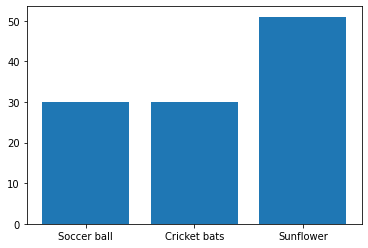

time: 210 ms (started: 2021-02-21 09:52:59 +00:00)


In [10]:
unique, count = np.unique(target, return_counts=True)
plt.bar(Categories, count)

In [11]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(flat_data, 
                                                 target, test_size = 0.3, random_state = 7)

time: 149 ms (started: 2021-02-21 09:53:00 +00:00)


In [12]:
# Grid search
from sklearn.model_selection import GridSearchCV
from sklearn import svm

param_grid = [
              {'C' : [1,10,100,1000], 'kernel' : ['linear']},
              {'C' : [1,10,100,1000], 'kernel' : ['rbf'], 'gamma' :[0.001,0.0001]},
]

svc = svm.SVC(probability = True) # we enable probablity inoder display the percentage
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 3min 8s (started: 2021-02-21 09:53:00 +00:00)


In [13]:
y_pred = clf.predict(x_test)
y_pred

array([2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2])

time: 270 ms (started: 2021-02-21 09:56:08 +00:00)


In [14]:
y_test

array([2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 1, 1, 1, 1, 0, 2, 0, 2])

time: 8.3 ms (started: 2021-02-21 09:56:09 +00:00)


In [15]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 3.34 ms (started: 2021-02-21 09:56:09 +00:00)


In [16]:
accuracy_score(y_pred, y_test)

0.9411764705882353

time: 9.04 ms (started: 2021-02-21 09:56:09 +00:00)


In [17]:
confusion_matrix(y_pred,y_test)

array([[ 9,  0,  0],
       [ 0,  7,  0],
       [ 1,  1, 16]])

time: 6.61 ms (started: 2021-02-21 09:56:09 +00:00)


In [18]:
# Saving model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 101 ms (started: 2021-02-21 09:56:09 +00:00)


In [19]:
model = pickle.load(open('img_model.p','rb'))

time: 27.6 ms (started: 2021-02-21 09:56:09 +00:00)


Enter URL of image https://www.allroundercricket.com/media/catalog/product/cache/2/image/9df78eab33525d08d6e5fb8d27136e95/2/a/2a20300c-pace-pro.jpg
(1000, 1000, 3)
This is a Cricket bats image


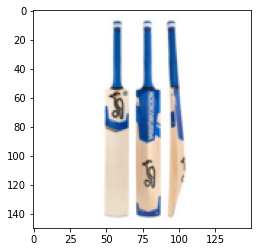

time: 5min 21s (started: 2021-02-21 09:56:09 +00:00)


In [20]:
flat_data = []
url = input('Enter URL of image ')
img = imread(url)
img_resize = resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out = model.predict(flat_data)
y_out = Categories[y_out[0]] # It will be in 2D so we should specify '0' index
print(f'This is a {y_out.capitalize()} image')

In [21]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

time: 7.65 s (started: 2021-02-21 10:01:31 +00:00)


In [39]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title("Image Classifier")
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image...", type = "jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img, caption='Uploaded Image')
  if st.button('PREDICT'):
    Categories = ['Soccer ball', 'Cricket bats', 'Sunflower']
    st.write("Result........")
    flat_data = []
    img = np.array(img)
    img_resize = resize(img,(150,150,3))
    flat_data.append(img_resize.flatten())
    flat_data = np.array(flat_data)
    st.write(img.shape)    
    y_out = model.predict(flat_data)
    y_out = Categories[y_out[0]] # It will be in 2D so we should specify '0' index
    st.title(f'This is a {y_out.capitalize()} image')

Overwriting app.py
time: 31.2 ms (started: 2021-02-21 10:20:12 +00:00)


In [40]:
!nohup streamlit run app.py &

url = ngrok.connect(port = '8501')
url

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://d6fa842f03d0.ngrok.io" -> "http://localhost:80">

time: 459 ms (started: 2021-02-21 10:20:41 +00:00)


In [38]:
!streamlit run --server.port 80 app.py >/dev/null

time: 1min 15s (started: 2021-02-21 10:18:52 +00:00)
